In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request

# 1. Importation et travail sur les bdd

In [2]:
#df=pd.read_csv('WDIData.csv')
df=pd.read_csv('C:/Users/julie/Documents/ENSAE/2A/S1/python/projet/WDIData.csv')

In [3]:
df.rename(columns={'Indicator Name': 'Indicator', '2019': 'Value_2019'}, inplace=True)

In [4]:
# Base women
women=df[df.Indicator.str.contains('women', case=False)]

In [6]:
women=women[["Country Code", "Country Name", "Indicator", "Indicator Code", "Value_2019"]]
women.rename(columns={'Value_2019': 'Value_women_2019'}, inplace=True)

In [46]:
# on sélectionne le PIB par tête
df_pib=df[df['Indicator']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Code","Value_2019"]]

### Fusion des bdd

In [12]:
df_women_gdp=women.merge(df_pib, on='Country Code', how='left')
df_women_gdp.rename(columns={'Value_2019': 'Value_gdp_2019'}, inplace=True)

In [13]:
df_women_gdp.head(5)

,Country Code,Country Name,Indicator,Indicator Code,Value_women_2019,Value_gdp_2019
0,AFE,Africa Eastern and Southern,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,93.231944,1499.256275
1,AFE,Africa Eastern and Southern,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,90.131889,1499.256275
2,AFE,Africa Eastern and Southern,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,1499.256275
3,AFE,Africa Eastern and Southern,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN,1499.256275
4,AFE,Africa Eastern and Southern,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN,1499.256275


# 2. Analyse des 25 variables pour étudier leur pertinence

J'ai testé toutes les variables. Celles qui ne figurent pas ci-dessous n'ont que très peu de valeurs (quelques points seulement).

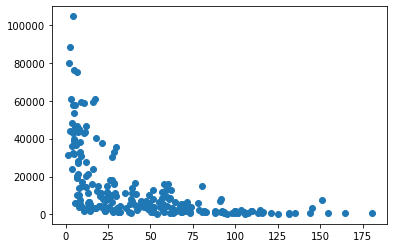

In [21]:
# Adolescent fertility rate (births per 1000 women between 15 and 19)
df_1=df_women_gdp[df_women_gdp['Indicator Code']=="SP.ADO.TFRT"]
x_1 = df_1.Value_women_2019
y_1 = df_1.Value_gdp_2019
plt.scatter(x_1, y_1)
plt.show()

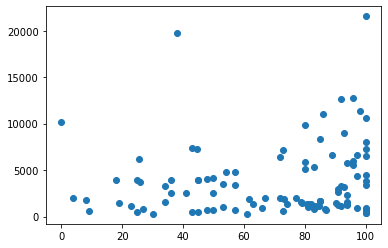

In [23]:
# Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)
df_2=df_women_gdp[df_women_gdp['Indicator Code']=="SH.HIV.PMTC.ZS"]
x_2 = df_2.Value_women_2019
y_2 = df_2.Value_gdp_2019
plt.scatter(x_2, y_2)
plt.show()

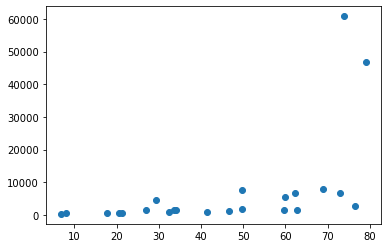

In [25]:
# Contraceptive prevalence, any methods (% of women ages 15-49)
df_3=df_women_gdp[df_women_gdp['Indicator Code']=="SP.DYN.CONU.ZS"]
x_3 = df_3.Value_women_2019
y_3 = df_3.Value_gdp_2019
plt.scatter(x_3, y_3)
plt.show()

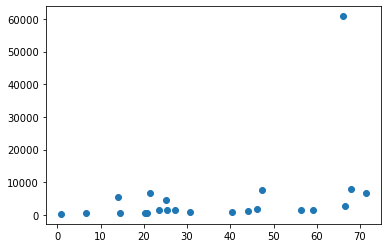

In [27]:
# Contraceptive prevalence, modern methods (% of women ages 15-49)
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SP.DYN.CONM.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

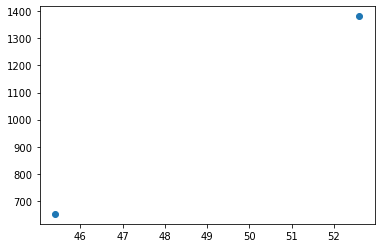

In [28]:
# Demand for planning satisfied
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.FPL.SATM.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

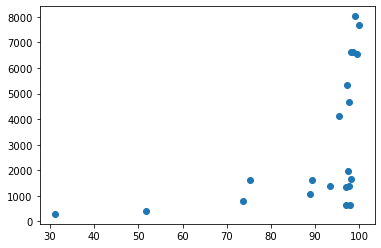

In [29]:
# Pregnant women receiving prenatal care
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.STA.ANVC.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

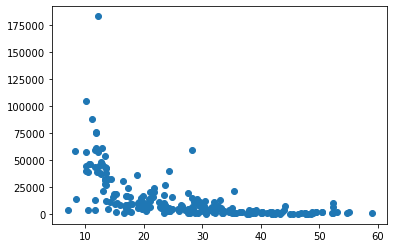

In [30]:
# Prevalence of anemia among non-pregnant women (%) 
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.ANM.NPRG.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

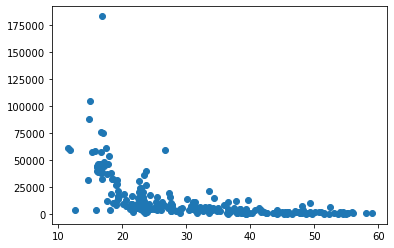

In [31]:
# Prevalence of anemia among pregnant women (%) 
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.PRG.ANEM"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

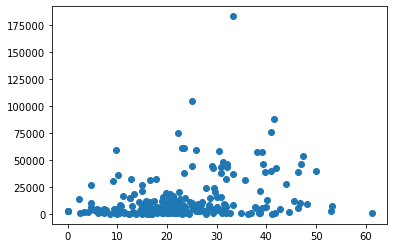

In [32]:
# Proportion of seats held by women in national parliaments 
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SG.GEN.PARL.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

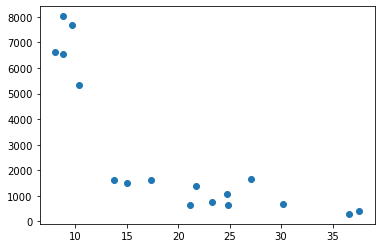

In [35]:
# Unmet need of contraception
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SP.UWT.TFRT"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

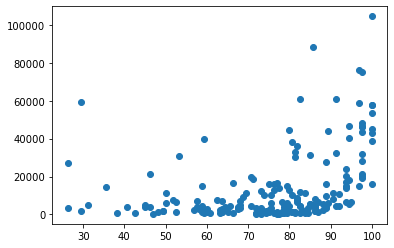

In [36]:
# Women Business and the Law Index Score (scale 1-100): The index measures how laws and regulations affect women’s economic opportunity.
# 100 = best score
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SG.LAW.INDX"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

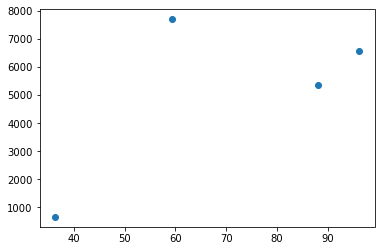

In [37]:
# Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SG.DMK.SRCR.FN.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

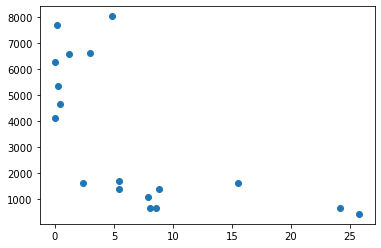

In [43]:
# Women first married by age 15
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SP.M15.2024.FE.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

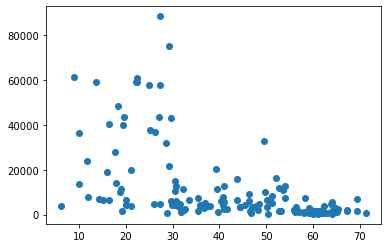

In [44]:
# Women's share of population ages 15+ living with HIV (%)
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()